In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = "{:.3f}".format

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internalgelsd")

import math
from IPython.display import display
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style("white")


In [6]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
df = pd.read_csv(data_path, header=4)

In [7]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [8]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [9]:
def murder(c):
    if c["Murder and\nnonnegligent\nmanslaughter"] > 0:
        return 1
    elif c["Murder and\nnonnegligent\nmanslaughter"] == 0:
        return 0
    

In [10]:
df["murder"] = df.apply(murder, axis=1)

In [11]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [12]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
dtype: object

In [13]:
df["Population"].head()

0     1,861
1     2,577
2     2,846
3    97,956
4     6,388
Name: Population, dtype: object

In [14]:
df["Population"] = df["Population"].str.replace(",", "")

In [16]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,1861,0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,2577,3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,2846,3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,97956,791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,6388,23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [17]:
df["Population"] = pd.to_numeric(df["Population"])

In [18]:
df["Robbery"] = df["Robbery"].str.replace(",", "")

In [19]:
df["Robbery"] = pd.to_numeric(df["Robbery"])

In [20]:
df["Property\ncrime"] = df["Property\ncrime"].str.replace(",", "")

df["Property\ncrime"] = pd.to_numeric(df["Property\ncrime"])

In [21]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
dtype: object

In [22]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,0.000


In [23]:
df["Pop_Squared"] = df["Population"] ** 2

In [24]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,0.000,3463321.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,0.000,6640929.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,0.000,8099716.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,0.000,40806544.000


In [25]:
def robbery(c):
    if c["Robbery"] > 0:
        return 1
    elif c["Robbery"] == 0:
        return 0
    
df["robbery"] = df.apply(robbery, axis=1)
    

In [26]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,0.000,3463321.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,0.000,6640929.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,0.000,8099716.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000,1.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,0.000,40806544.000,1.000


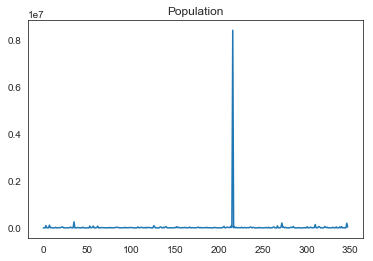

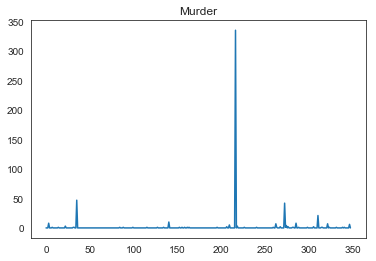

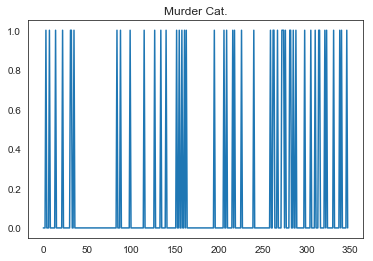

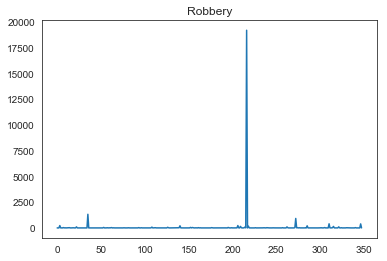

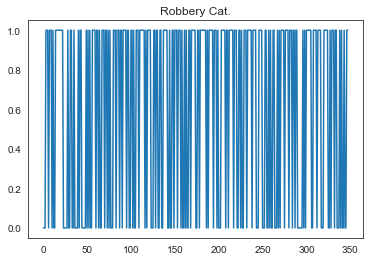

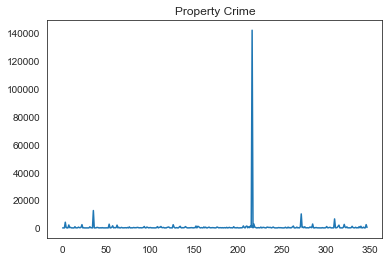

In [27]:

plt.plot(df["Population"])
plt.title("Population")
plt.show()

plt.plot(df["Murder and\nnonnegligent\nmanslaughter"])
plt.title("Murder")
plt.show()
          
plt.plot(df["murder"])
plt.title("Murder Cat.")
plt.show()

plt.plot(df["Robbery"])
plt.title("Robbery")
plt.show()

plt.plot(df["robbery"])
plt.title("Robbery Cat.")
plt.show()

plt.plot(df["Property\ncrime"])
plt.title("Property Crime")
plt.show()

In [28]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Arson3,murder,Pop_Squared,robbery
count,348.000,348.000,0.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,1.566,nan,72.902,792.606,1.872,0.141,203554650960.236,0.601
std,450037.368,18.304,nan,1031.033,7659.725,10.693,0.348,3778875542708.130,0.490
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,nan,0.000,40.500,0.000,0.000,9018117.000,0.000
50%,7233.500,0.000,nan,1.000,112.500,0.000,0.000,52325684.500,1.000
75%,18427.500,0.000,nan,5.000,341.000,1.000,0.000,339753567.000,1.000
max,8396126.000,335.000,nan,19170.000,141971.000,132.000,1.000,70494931807876.000,1.000


In [29]:
df[df["Robbery"] > 100]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000,1.000
22,Binghamton,46304.000,284,3.000,nan,19,101.000,161,2349.000,525,"1,767",57,nan,1.000,2144060416.000,1.000
35,Buffalo,258789.000,"3,249",47.000,nan,145,1322.000,"1,735",12491.000,"3,458","8,076",957,nan,1.000,66971746521.000,1.000
140,Hempstead Village,55198.000,433,10.000,nan,3,204.000,216,958.000,206,630,122,2.000,1.000,3046819204.000,1.000
206,Mount Vernon,68071.000,554,2.000,nan,7,228.000,317,1436.000,317,972,147,nan,1.000,4633661041.000,1.000
209,Newburgh,28571.000,435,5.000,nan,21,150.000,259,1040.000,304,673,63,15.000,1.000,816302041.000,1.000
216,New York,8396126.000,"52,384",335.000,nan,"1,112",19170.000,"31,767",141971.000,"16,606","117,931","7,434",nan,1.000,70494931807876.000,1.000
218,Niagara Falls,49574.000,584,3.000,nan,12,166.000,403,2807.000,746,"1,949",112,22.000,1.000,2457581476.000,1.000
272,Rochester,210562.000,"2,107",42.000,nan,92,918.000,"1,055",10051.000,"2,587","6,855",609,132.000,1.000,44336355844.000,1.000
285,Schenectady,66041.000,607,8.000,nan,31,203.000,365,2800.000,769,"1,878",153,nan,1.000,4361413681.000,1.000


In [30]:
features = df[["Population", "Pop_Squared", "murder", "robbery", "Property\ncrime"]]

In [31]:
features.head()

,Population,Pop_Squared,murder,robbery,Property crime
0,1861.000,3463321.000,0.000,0.000,12.000
1,2577.000,6640929.000,0.000,0.000,24.000
2,2846.000,8099716.000,0.000,0.000,16.000
3,97956.000,9595377936.000,1.000,1.000,4090.000
4,6388.000,40806544.000,0.000,1.000,223.000


In [32]:
len(features["murder"])

351

In [33]:
print(len(features["murder"]) - features["murder"].count())
print(len(features["Population"]) - features["Population"].count())
print(len(features["robbery"]) - features["robbery"].count())

3
3
3


In [34]:
features.isnull().sum()

Population         3
Pop_Squared        3
murder             3
robbery            3
Property\ncrime    3
dtype: int64

In [35]:
features = features.dropna()

In [36]:
regr = linear_model.LinearRegression()
Y = features["Property\ncrime"].values.reshape(-1,1)
X = features[["Population", "Pop_Squared", "murder", "robbery"]]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)
print("R-squared: ")
print(regr.score(X,Y))

Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]
Intercept: 
 [-109.57533562]
R-squared: 
0.9961247104988709


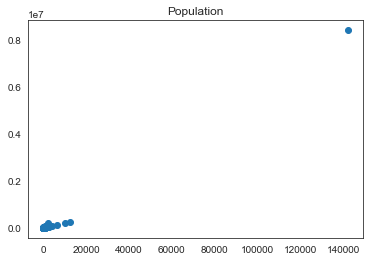

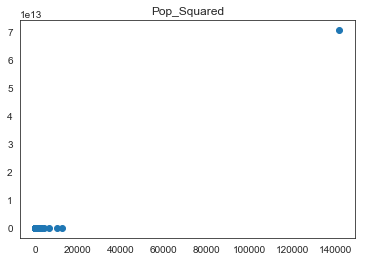

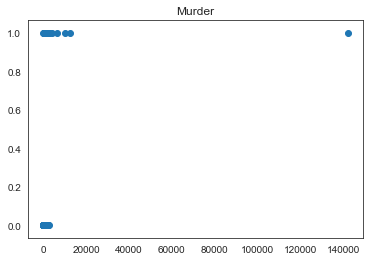

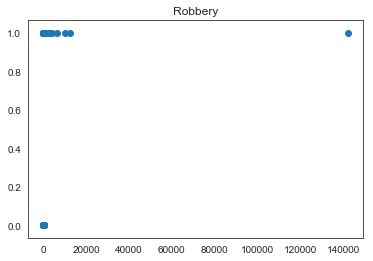

In [38]:
#exploring assumption #1: Linear Relationships

outcome = features["Property\ncrime"]

plt.scatter(outcome, features["Population"])
plt.title("Population")
plt.show()

plt.scatter(outcome, features["Pop_Squared"])
plt.title("Pop_Squared")
plt.show()

plt.scatter(outcome, features["murder"])
plt.title("Murder")
plt.show()

plt.scatter(outcome, features["robbery"])
plt.title("Robbery")
plt.show()

#Conclusion: datapoint where the population is higher than 200,000 is an outlier 
#and is causing the data not to have a linear relationship

In [39]:
features["Population"].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64

In [40]:
features[features["Population"] > 200000]

,Population,Pop_Squared,murder,robbery,Property crime
35,258789.000,66971746521.000,1.000,1.000,12491.000
216,8396126.000,70494931807876.000,1.000,1.000,141971.000
272,210562.000,44336355844.000,1.000,1.000,10051.000


In [41]:
features = features[features["Population"] < 200000]

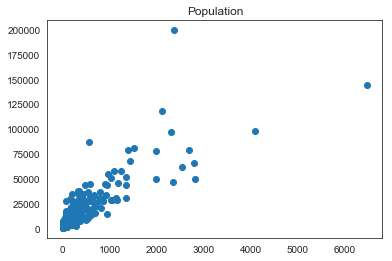

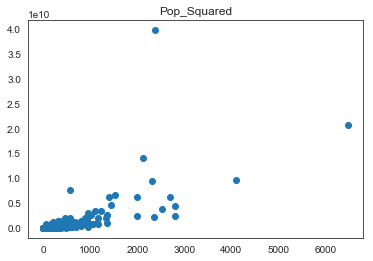

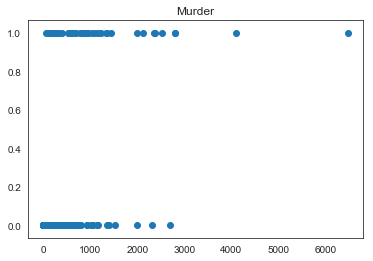

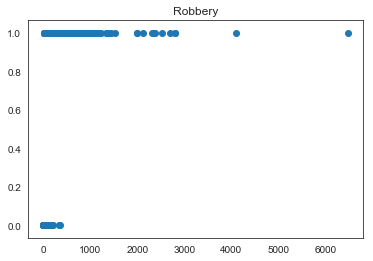

In [42]:
outcome = features["Property\ncrime"]

plt.scatter(outcome, features["Population"])
plt.title("Population")
plt.show()

plt.scatter(outcome, features["Pop_Squared"])
plt.title("Pop_Squared")
plt.show()

plt.scatter(outcome, features["murder"])
plt.title("Murder")
plt.show()

plt.scatter(outcome, features["robbery"])
plt.title("Robbery")
plt.show()

#looking at the new scatter plots below, there is one outlier in the Population (at about 2500, 200000).
# The Pop_Squared data (unsurprisingly) is not linear (it's quadratic). However, if I try to address this by taking the square root of this feature,
# I am just left with the "Population" feature.

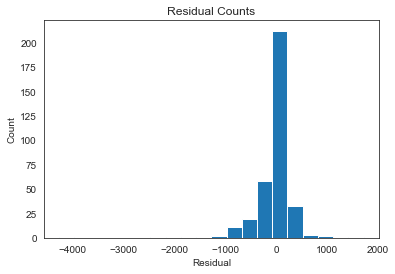

In [43]:
#exploring assumption #2: multivariate normality

X = features[["Population", "Pop_Squared", "murder", "robbery"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.hist(residual, bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

In [44]:
features["residual"] = residual
features["predicted"] = predicted

In [45]:
features[features["residual"] < -2000]

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
267,87204.000,7604537616.000,1.000,1.000,567.000,-2248.511,2815.511
346,199134.000,39654349956.000,1.000,1.000,2368.000,-4259.013,6627.013


In [46]:
features[features["Population"] > 199000]

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
346,199134.000,39654349956.000,1.000,1.000,2368.000,-4259.013,6627.013


In [47]:
features = features[features["Population"] < 199000]

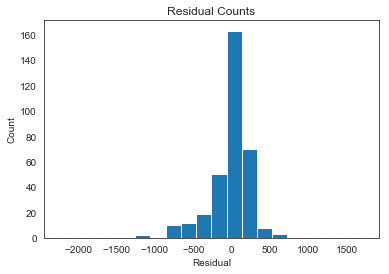

In [48]:
X = features[["Population", "Pop_Squared", "murder", "robbery"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.hist(residual, bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

In [49]:
features[(features["residual"] > 750) | (features["residual"] < -750)]

#there are still 14 datapoints that skew this distribution

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
3,97956.000,9595377936.000,1.000,1.000,4090.000,906.059,3183.941
7,118296.000,13993943616.000,1.000,1.000,2118.000,-1761.579,3879.579
22,46304.000,2144060416.000,1.000,1.000,2349.000,939.433,1409.567
45,34462.000,1187629444.000,0.000,0.000,198.000,-884.268,1082.268
57,80705.000,6513297025.000,0.000,1.000,1515.000,-1062.392,2577.392
126,96667.000,9344508889.000,0.000,1.000,2303.000,-821.611,3124.611
127,44787.000,2005875369.000,1.000,1.000,578.000,-779.284,1357.284
140,55198.000,3046819204.000,1.000,1.000,958.000,-757.900,1715.900
214,78800.000,6209440000.000,0.000,1.000,1391.000,-1121.012,2512.012
218,49574.000,2457581476.000,1.000,1.000,2807.000,1284.767,1522.233


In [50]:
features["residual"].describe()

count     344.000
mean       -7.646
std       326.901
min     -2248.511
25%       -89.045
50%        53.288
75%       125.644
max      1722.482
Name: residual, dtype: float64

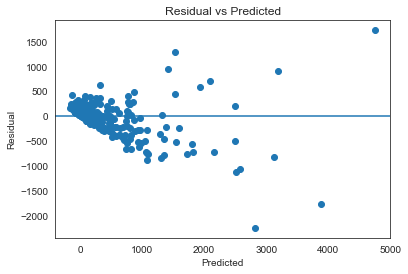

In [51]:
#exploring assumption #3: homoscedasticity
X = features[["Population", "Pop_Squared", "murder", "robbery"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

#the poorly estimated area is when the prediction 
#is higher than 2500

In [52]:
features[features["predicted"] > 2500]

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
3,97956.000,9595377936.000,1.000,1.000,4090.000,906.059,3183.941
7,118296.000,13993943616.000,1.000,1.000,2118.000,-1761.579,3879.579
57,80705.000,6513297025.000,0.000,1.000,1515.000,-1062.392,2577.392
126,96667.000,9344508889.000,0.000,1.000,2303.000,-821.611,3124.611
214,78800.000,6209440000.000,0.000,1.000,1391.000,-1121.012,2512.012
267,87204.000,7604537616.000,1.000,1.000,567.000,-2248.511,2815.511
310,143834.000,20688219556.000,1.000,1.000,6473.000,1722.482,4750.518


In [53]:
df.iloc[[3,7, 57, 126, 214, 267, 310], :]

#pulling the full data for the datapoints where the predicted is greater than 2500

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000,1.000
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32,3.000,1.000,13993943616.000,1.000
57,Clarkstown Town,80705.000,65,0.000,nan,8,17.000,40,1515.000,99,"1,388",28,nan,0.000,6513297025.000,1.000
126,Greece Town,96667.000,151,0.000,nan,9,60.000,82,2303.000,332,"1,925",46,nan,0.000,9344508889.000,1.000
214,New Rochelle,78800.000,175,0.000,nan,5,81.000,89,1391.000,150,"1,172",69,nan,0.000,6209440000.000,1.000
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13,nan,1.000,7604537616.000,1.000
310,Syracuse,143834.000,"1,192",21.000,nan,75,400.000,696,6473.000,"1,781","4,298",394,57.000,1.000,20688219556.000,1.000


In [54]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Arson3,murder,Pop_Squared,robbery
count,348.000,348.000,0.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,1.566,nan,72.902,792.606,1.872,0.141,203554650960.236,0.601
std,450037.368,18.304,nan,1031.033,7659.725,10.693,0.348,3778875542708.130,0.490
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,nan,0.000,40.500,0.000,0.000,9018117.000,0.000
50%,7233.500,0.000,nan,1.000,112.500,0.000,0.000,52325684.500,1.000
75%,18427.500,0.000,nan,5.000,341.000,1.000,0.000,339753567.000,1.000
max,8396126.000,335.000,nan,19170.000,141971.000,132.000,1.000,70494931807876.000,1.000


In [55]:
df["Motor\nvehicle\ntheft"].describe()

count     348
unique     51
top         0
freq       93
Name: Motor\nvehicle\ntheft, dtype: object

In [56]:
df["Motor\nvehicle\ntheft"] = df["Motor\nvehicle\ntheft"].str.replace(",", "")

df["Motor\nvehicle\ntheft"] = pd.to_numeric(df["Motor\nvehicle\ntheft"])

In [57]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
count,348.000,348.000,0.000,348.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,1.566,nan,72.902,792.606,35.905,1.872,0.141,203554650960.236,0.601
std,450037.368,18.304,nan,1031.033,7659.725,403.424,10.693,0.348,3778875542708.130,0.490
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,nan,0.000,40.500,0.000,0.000,0.000,9018117.000,0.000
50%,7233.500,0.000,nan,1.000,112.500,2.000,0.000,0.000,52325684.500,1.000
75%,18427.500,0.000,nan,5.000,341.000,7.000,1.000,0.000,339753567.000,1.000
max,8396126.000,335.000,nan,19170.000,141971.000,7434.000,132.000,1.000,70494931807876.000,1.000


In [58]:
df["arson"] = np.where(df["Arson3"] > 1, 1, 0)

In [59]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0


In [60]:
df["Car Theft"] = np.where(df["Motor\nvehicle\ntheft"] >= 10, 2, (10 > np.where(df["Motor\nvehicle\ntheft"] > 1, 1, 0)))

In [61]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,1
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,1
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1
5,Alfred Village,4089.000,5,0.000,nan,0,3.000,2,46.000,10,36,0.000,nan,0.000,16719921.000,1.000,0,1
6,Allegany Village,1781.000,3,0.000,nan,0,0.000,3,10.000,0,10,0.000,0.000,0.000,3171961.000,0.000,0,1
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2
8,Amityville Village,9519.000,9,0.000,nan,2,4.000,3,210.000,16,188,6.000,1.000,0.000,90611361.000,1.000,0,1
9,Amsterdam,18182.000,30,0.000,nan,0,12.000,18,405.000,99,291,15.000,0.000,0.000,330585124.000,1.000,0,2


In [62]:
df["Car Theft"] = np.where(df["Motor\nvehicle\ntheft"] == 0, 0, df["Car Theft"])

In [63]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1
5,Alfred Village,4089.000,5,0.000,nan,0,3.000,2,46.000,10,36,0.000,nan,0.000,16719921.000,1.000,0,0
6,Allegany Village,1781.000,3,0.000,nan,0,0.000,3,10.000,0,10,0.000,0.000,0.000,3171961.000,0.000,0,0
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2
8,Amityville Village,9519.000,9,0.000,nan,2,4.000,3,210.000,16,188,6.000,1.000,0.000,90611361.000,1.000,0,1
9,Amsterdam,18182.000,30,0.000,nan,0,12.000,18,405.000,99,291,15.000,0.000,0.000,330585124.000,1.000,0,2


In [64]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
murder                                    float64
Pop_Squared                               float64
robbery                                   float64
arson                                       int32
Car Theft                                   int32
dtype: object

In [65]:
# After looking at the first 3 assumptions, I've decided features need to be added to help meet the assumptions. 
#I've added "car theft" as a 0, 1 (between 1-10), and 2 (greater than 10)
#I've added "arson" as a 0 or 1
#both of these crimes are related to property damage
#I'm removing pop_squared since that relationship is not linear and then it is repetitive when it's square rooted

#dropping the NaN and rows with a pop. over 199000

df = df[df["Population"] < 199000]




In [66]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1


In [67]:
regr = linear_model.LinearRegression()
Y = df["Property\ncrime"].values.reshape(-1,1)
X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]
regr.fit(X,Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)
print("R-squared: ")
print(regr.score(X,Y))

Coefficients: 
 [[ 2.58818726e-02  1.32595426e+02 -1.12316533e+01 -7.08847502e+00
   1.56845002e+02]]
Intercept: 
 [-66.97514263]
R-squared: 
0.7557436704816607


### re-testing for the assumptions below

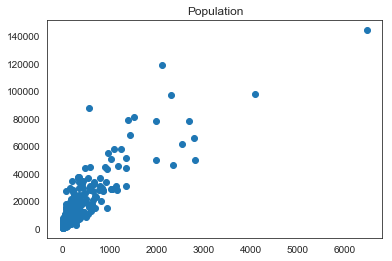

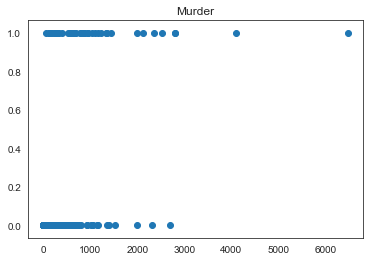

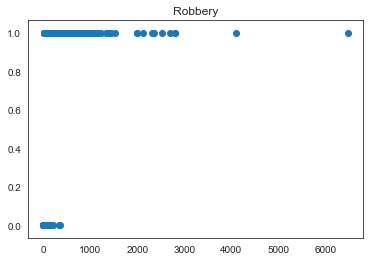

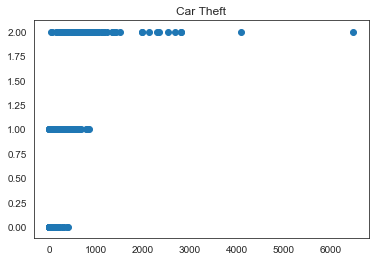

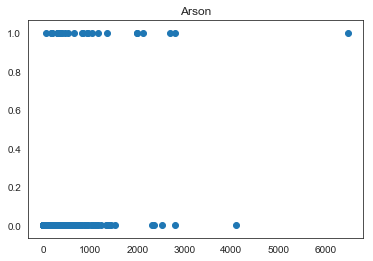

In [69]:
#assumption 1: linear relationships

outcome = df["Property\ncrime"]

plt.scatter(outcome, df["Population"])
plt.title("Population")
plt.show()

plt.scatter(outcome, df["murder"])
plt.title("Murder")
plt.show()

plt.scatter(outcome, df["robbery"])
plt.title("Robbery")
plt.show()

plt.scatter(outcome, df["Car Theft"])
plt.title("Car Theft")
plt.show()

plt.scatter(outcome, df["arson"])
plt.title("Arson")
plt.show()


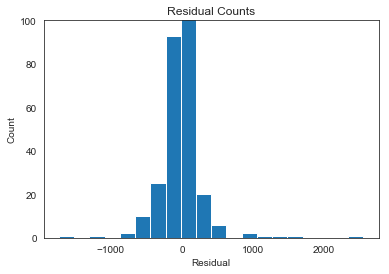

In [70]:
#assumption 2: multivariate normality

X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.hist(residual, bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.ylim(0,100)
plt.show()

#there is still some non-normality outside of the 1000+/-

#what many of these residual outliers have in common is a high robbery score, so I am going to limit the scope of this 
#model to cities that have less than 100 robberies

In [71]:
df["Predicted"] = predicted
df["Residual"] = residual

In [72]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0,-18.809,30.809
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1,-7.366,31.366
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0,6.685,9.315
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2,2575.496,1514.504
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1,80.038,142.962


In [73]:
df[df["Residual"] > 1000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2,2575.496,1514.504
22,Binghamton,46304.000,284,3.000,nan,19,101.000,161,2349.000,525,"1,767",57.000,nan,1.000,2144060416.000,1.000,0,2,1238.646,1110.354
218,Niagara Falls,49574.000,584,3.000,nan,12,166.000,403,2807.000,746,"1,949",112.000,22.000,1.000,2457581476.000,1.000,1,2,1480.125,1326.875
285,Schenectady,66041.000,607,8.000,nan,31,203.000,365,2800.000,769,"1,878",153.000,nan,1.000,4361413681.000,1.000,0,2,1749.476,1050.524
310,Syracuse,143834.000,"1,192",21.000,nan,75,400.000,696,6473.000,"1,781","4,298",394.000,57.000,1.000,20688219556.000,1.000,1,2,3919.750,2553.250


In [74]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
count,344.000,344.000,0.000,344.000,344.000,344.000,185.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000
mean,14152.573,0.334,nan,10.378,316.703,9.474,1.124,0.131,555593819.666,0.596,0.084,0.916,316.703,-0.000
std,18876.821,1.560,nan,36.304,602.881,28.851,4.758,0.338,1784161632.486,0.491,0.278,0.671,524.106,297.958
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,-53.361,-1730.214
25%,2983.250,0.000,nan,0.000,39.000,0.000,0.000,0.000,8899789.750,0.000,0.000,0.000,2.638,-97.232
50%,7106.000,0.000,nan,1.000,111.500,2.000,0.000,0.000,50495272.000,1.000,0.000,1.000,119.546,24.352
75%,17889.250,0.000,nan,5.000,334.750,7.000,1.000,0.000,320027178.250,1.000,0.000,1.000,425.987,68.681
max,143834.000,21.000,nan,400.000,6473.000,394.000,57.000,1.000,20688219556.000,1.000,1.000,2.000,3919.750,2553.250


In [75]:
df[df["Robbery"] > 100]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2,2575.496,1514.504
22,Binghamton,46304.000,284,3.000,nan,19,101.000,161,2349.000,525,"1,767",57.000,nan,1.000,2144060416.000,1.000,0,2,1238.646,1110.354
140,Hempstead Village,55198.000,433,10.000,nan,3,204.000,216,958.000,206,630,122.000,2.000,1.000,3046819204.000,1.000,1,2,1625.684,-667.684
206,Mount Vernon,68071.000,554,2.000,nan,7,228.000,317,1436.000,317,972,147.000,nan,1.000,4633661041.000,1.000,0,2,1802.017,-366.017
209,Newburgh,28571.000,435,5.000,nan,21,150.000,259,1040.000,304,673,63.000,15.000,1.000,816302041.000,1.000,1,2,936.528,103.472
218,Niagara Falls,49574.000,584,3.000,nan,12,166.000,403,2807.000,746,"1,949",112.000,22.000,1.000,2457581476.000,1.000,1,2,1480.125,1326.875
285,Schenectady,66041.000,607,8.000,nan,31,203.000,365,2800.000,769,"1,878",153.000,nan,1.000,4361413681.000,1.000,0,2,1749.476,1050.524
310,Syracuse,143834.000,"1,192",21.000,nan,75,400.000,696,6473.000,"1,781","4,298",394.000,57.000,1.000,20688219556.000,1.000,1,2,3919.750,2553.250
315,Troy,49898.000,371,1.000,nan,14,145.000,211,1985.000,593,"1,305",87.000,5.000,1.000,2489810404.000,1.000,1,2,1488.510,496.490
321,Utica,61686.000,361,7.000,nan,27,102.000,225,2528.000,449,"1,997",82.000,nan,1.000,3805162596.000,1.000,0,2,1636.761,891.239


In [76]:
df = df[df["Robbery"] <= 100]

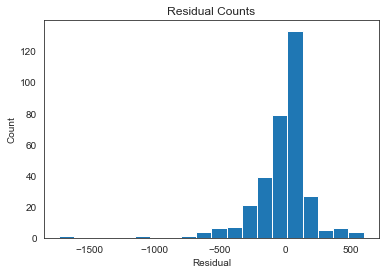

In [77]:
#testing the multivariate normality after removing high robbery

X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]


plt.hist(df["Residual"], bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

#still need to address the residuals that are over 1000 in the negative direction
#not seeing a clean way to remove those two datapoints

In [78]:
df[df["Residual"] < -750]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2,3258.779,-1140.779
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13.000,nan,1.000,7604537616.000,1.000,0,2,2297.214,-1730.214


In [79]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
count,334.000,334.000,0.000,334.000,334.000,334.000,180.000,334.000,334.000,334.000,334.000,334.000,334.000,334.000
mean,12578.898,0.141,nan,4.922,246.946,5.689,0.594,0.105,410436723.395,0.584,0.072,0.883,270.937,-23.991
std,15904.887,0.549,nan,11.363,365.751,10.428,1.397,0.307,1273358558.555,0.494,0.259,0.654,437.568,217.256
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,-53.361,-1730.214
25%,2862.500,0.000,nan,0.000,38.250,0.000,0.000,0.000,8194723.000,0.000,0.000,0.000,-1.556,-98.285
50%,6840.500,0.000,nan,1.000,107.500,2.000,0.000,0.000,46794602.500,1.000,0.000,1.000,107.963,22.412
75%,15788.000,0.000,nan,4.000,314.500,6.000,1.000,0.000,249318076.000,1.000,0.000,1.000,388.662,62.837
max,118296.000,7.000,nan,100.000,2689.000,73.000,10.000,1.000,13993943616.000,1.000,1.000,2.000,3258.779,596.409


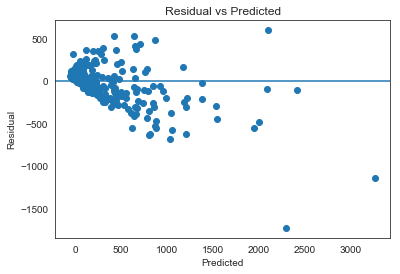

In [80]:
#assumption 3: homoscedasticity

X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]


plt.scatter(predicted, df["Residual"])
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

# the model appears to be less homoscedastic when the predicted value is greater than 1500
# all of these have high robbery, so I am going to adjust my feature to be a 0, 1, or 2

In [81]:
df[df["Predicted"] > 1500].sort_values("Residual")

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13.000,nan,1.000,7604537616.000,1.000,0,2,2297.214,-1730.214
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2,3258.779,-1140.779
214,New Rochelle,78800.000,175,0.000,nan,5,81.000,89,1391.000,150,"1,172",69.000,nan,0.000,6209440000.000,1.000,0,2,1947.108,-556.108
57,Clarkstown Town,80705.000,65,0.000,nan,8,17.000,40,1515.000,99,"1,388",28.000,nan,0.000,6513297025.000,1.000,0,2,1996.413,-481.413
314,Tonawanda Town,58082.000,118,1.000,nan,5,26.000,86,1099.000,190,882,27.000,1.000,1.000,3373518724.000,1.000,0,2,1543.483,-444.483
340,White Plains,57559.000,78,1.000,nan,3,28.000,46,1232.000,77,"1,134",21.000,nan,1.000,3313038481.000,1.000,0,2,1529.946,-297.946
126,Greece Town,96667.000,151,0.000,nan,9,60.000,82,2303.000,332,"1,925",46.000,nan,0.000,9344508889.000,1.000,0,2,2409.539,-106.539
62,Colonie Town,78215.000,63,0.000,nan,0,31.000,32,1990.000,186,"1,753",51.000,10.000,0.000,6117586225.000,1.000,1,2,2088.812,-98.812
53,Cheektowaga Town,78361.000,158,0.000,nan,11,48.000,99,2689.000,345,"2,271",73.000,2.000,0.000,6140446321.000,1.000,1,2,2092.591,596.409


In [82]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
count,334.000,334.000,0.000,334.000,334.000,334.000,180.000,334.000,334.000,334.000,334.000,334.000,334.000,334.000
mean,12578.898,0.141,nan,4.922,246.946,5.689,0.594,0.105,410436723.395,0.584,0.072,0.883,270.937,-23.991
std,15904.887,0.549,nan,11.363,365.751,10.428,1.397,0.307,1273358558.555,0.494,0.259,0.654,437.568,217.256
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,-53.361,-1730.214
25%,2862.500,0.000,nan,0.000,38.250,0.000,0.000,0.000,8194723.000,0.000,0.000,0.000,-1.556,-98.285
50%,6840.500,0.000,nan,1.000,107.500,2.000,0.000,0.000,46794602.500,1.000,0.000,1.000,107.963,22.412
75%,15788.000,0.000,nan,4.000,314.500,6.000,1.000,0.000,249318076.000,1.000,0.000,1.000,388.662,62.837
max,118296.000,7.000,nan,100.000,2689.000,73.000,10.000,1.000,13993943616.000,1.000,1.000,2.000,3258.779,596.409


In [83]:
df["robbery"] = np.where(df["Robbery"] > 8, 2, df["robbery"])



In [84]:
df[df["Predicted"] > 1500].sort_values("Residual")

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13.000,nan,1.000,7604537616.000,2.000,0,2,2297.214,-1730.214
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,2.000,1,2,3258.779,-1140.779
214,New Rochelle,78800.000,175,0.000,nan,5,81.000,89,1391.000,150,"1,172",69.000,nan,0.000,6209440000.000,2.000,0,2,1947.108,-556.108
57,Clarkstown Town,80705.000,65,0.000,nan,8,17.000,40,1515.000,99,"1,388",28.000,nan,0.000,6513297025.000,2.000,0,2,1996.413,-481.413
314,Tonawanda Town,58082.000,118,1.000,nan,5,26.000,86,1099.000,190,882,27.000,1.000,1.000,3373518724.000,2.000,0,2,1543.483,-444.483
340,White Plains,57559.000,78,1.000,nan,3,28.000,46,1232.000,77,"1,134",21.000,nan,1.000,3313038481.000,2.000,0,2,1529.946,-297.946
126,Greece Town,96667.000,151,0.000,nan,9,60.000,82,2303.000,332,"1,925",46.000,nan,0.000,9344508889.000,2.000,0,2,2409.539,-106.539
62,Colonie Town,78215.000,63,0.000,nan,0,31.000,32,1990.000,186,"1,753",51.000,10.000,0.000,6117586225.000,2.000,1,2,2088.812,-98.812
53,Cheektowaga Town,78361.000,158,0.000,nan,11,48.000,99,2689.000,345,"2,271",73.000,2.000,0.000,6140446321.000,2.000,1,2,2092.591,596.409


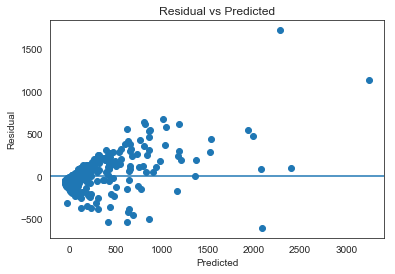

In [85]:
X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = df["Property\ncrime"]

residual = predicted - actual

plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

In [86]:
df["Residual"] = residual

In [87]:
df[df["Residual"] > 1000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,2.000,1,2,3258.779,1129.547
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13.000,nan,1.000,7604537616.000,2.000,0,2,2297.214,1718.983


In [90]:
df["Violent\ncrime"] = pd.to_numeric(df["Violent\ncrime"])

In [91]:
df["Rape\n(legacy\ndefinition)2"] = pd.to_numeric(df["Rape\n(legacy\ndefinition)2"])

In [92]:
df[df["Residual"] < 500].describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
count,323.000,323.000,323.000,0.000,323.000,323.000,323.000,323.000,176.000,323.000,323.000,323.000,323.000,323.000,323.000,323.000
mean,11226.935,16.164,0.130,nan,1.232,4.554,235.111,5.294,0.568,0.096,304781841.950,0.718,0.068,0.861,234.474,-2.272
std,13390.028,30.252,0.542,nan,2.640,10.587,349.649,9.809,1.388,0.295,894975171.230,0.704,0.252,0.647,369.766,161.637
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,-53.361,-607.641
25%,2763.000,1.000,0.000,nan,0.000,0.000,36.500,0.000,0.000,0.000,7635130.000,0.000,0.000,0.000,-3.419,-65.205
50%,6582.000,5.000,0.000,nan,0.000,1.000,101.000,2.000,0.000,0.000,43322724.000,1.000,0.000,1.000,102.033,-25.124
75%,14415.000,17.000,0.000,nan,1.000,4.000,296.000,5.000,0.250,0.000,207820114.000,1.000,0.000,1.000,323.085,85.746
max,96667.000,286.000,7.000,nan,20.000,100.000,2689.000,73.000,10.000,1.000,9344508889.000,2.000,1.000,2.000,2409.539,470.181


In [93]:
df["Violent\ncrime"].quantile([0.75,0.80, .85, .9, .95, .97])



0.750    18.000
0.800    23.000
0.850    33.050
0.900    43.100
0.950    71.400
0.970   107.020
Name: Violent\ncrime, dtype: float64

In [94]:
df.columns


Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'murder',
       'Pop_Squared', 'robbery', 'arson', 'Car Theft', 'Predicted',
       'Residual'],
      dtype='object')

In [95]:
#based on the high population and high amount of violent crime (97th percentile), 
#Amherst is an outlier and will not be included in the model 
#Ramapo Town is also an outlier and will not be included in the model. Further research could be done to determine exactly what
#makes this town an outlier.

df = df[df["Residual"] < 1000]

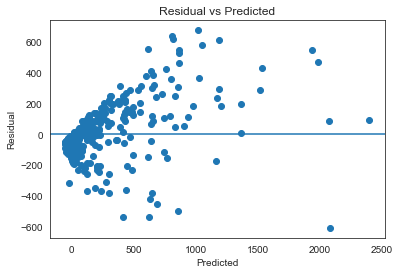

In [96]:
X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = df["Property\ncrime"]

residual = predicted - actual

plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

### Validating the Regression Model

In [104]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'murder',
       'Pop_Squared', 'robbery', 'arson', 'Car Theft', 'Predicted',
       'Residual'],
      dtype='object')

In [119]:
df.columns = ["City", "Population", "Violent Crime", "Murder and Manslaughter", "Rape - revised", 
              "Rape - legacy", "Robbery", "Aggravated Assault", "PropertyCrime", "Burglary", "Larceny", "Motor Vehicle Theft",
              "Arson", "MurderCat", "Pop Squared", "RobberyCat", "ArsonCat", "CarTheftCat", "Predicted", "Residual"]

In [120]:
df.head()

,City,Population,Violent Crime,Murder and Manslaughter,Rape - revised,Rape - legacy,Robbery,Aggravated Assault,PropertyCrime,Burglary,Larceny,Motor Vehicle Theft,Arson,MurderCat,Pop Squared,RobberyCat,ArsonCat,CarTheftCat,Predicted,Residual
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0,-18.809,-30.809
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1,-7.366,-31.366
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0,6.685,-9.315
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1,80.038,-142.962
5,Alfred Village,4089.000,5,0.000,nan,0,3.000,2,46.000,10,36,0.000,nan,0.000,16719921.000,1.000,0,0,27.624,-18.376


In [121]:
linear_formula = "PropertyCrime ~ Population+MurderCat+RobberyCat+CarTheftCat+ArsonCat"

#lm = smf.ols(formula=linear_formula, data=df).fit()

In [122]:
lm = smf.ols(formula=linear_formula, data=df).fit()

In [123]:
lm.params


Intercept     -61.897
Population      0.018
MurderCat      -4.350
RobberyCat     88.375
CarTheftCat    19.639
ArsonCat       98.890
dtype: float64

In [124]:
lm.pvalues
#MurderCat and CarTheftCat are both above a pvalue of .05, so they are probably not having a significant impact on the model

Intercept     0.000
Population    0.000
MurderCat     0.893
RobberyCat    0.000
CarTheftCat   0.304
ArsonCat      0.007
dtype: float64

In [125]:
lm.rsquared

0.7974572096661988

In [126]:
linear_formula = "PropertyCrime ~ Population+RobberyCat+ArsonCat"

In [127]:
lm = smf.ols(formula=linear_formula, data=df).fit()

In [128]:
lm.params

Intercept    -53.928
Population     0.018
RobberyCat    95.804
ArsonCat     101.946
dtype: float64

In [129]:
lm.rsquared
#removing those two parameters did not affect the rsquared value

0.7967955533644241

In [137]:
#importing a different crime dataset from 2014 so that I can test this regression model

dftest = pd.read_excel("crime_New_York_by_city_2014.xls", header=4)

In [138]:
dftest.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000


In [139]:
def murder(c):
    if c["Murder and\nnonnegligent\nmanslaughter"] > 0:
        return 1
    elif c["Murder and\nnonnegligent\nmanslaughter"] == 0:
        return 0
    

In [140]:
dftest["murder"] = dftest.apply(murder, axis=1)

In [141]:
dftest.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,1.000


In [143]:
dftest.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
murder                                    float64
dtype: object

In [144]:
dftest["Population"].head()

0    1851.000
1    2568.000
2     820.000
3    2842.000
4   98595.000
Name: Population, dtype: float64

In [145]:
def robbery(c):
    if c["Robbery"] > 0:
        return 1
    elif c["Robbery"] == 0:
        return 0
    
dftest["robbery"] = dftest.apply(robbery, axis=1)
    

In [146]:
dftest["arson"] = np.where(dftest["Arson3"] > 1, 1, 0)

In [147]:
dftest.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,robbery,arson
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,0.000,0.000,0
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,0.000,1.000,0
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,0.000,0.000,0
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,1.000,1.000,1


In [148]:
dftest["Car Theft"] = np.where(dftest["Motor\nvehicle\ntheft"] >= 10, 2, (10 > np.where(dftest["Motor\nvehicle\ntheft"] > 1, 1, 0)))

In [149]:
dftest.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,robbery,arson,Car Theft
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,0.000,0.000,0,1
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,0.000,1.000,0,1
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0,1
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,0.000,0.000,0,1
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,1.000,1.000,1,2
5,Albion Village4,5872.000,26.000,0.000,3.000,nan,2.000,21.000,204.000,41.000,159.000,4.000,0.000,0.000,1.000,0,1
6,Alexandria Bay Village4,1107.000,0.000,0.000,0.000,nan,0.000,0.000,7.000,2.000,5.000,0.000,0.000,0.000,0.000,0,1
7,Alfred Village4,4032.000,11.000,1.000,1.000,nan,0.000,9.000,30.000,6.000,24.000,0.000,0.000,1.000,0.000,0,1
8,Altamont Village4,1723.000,1.000,0.000,0.000,nan,0.000,1.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0,1
9,Amherst Town4,118860.000,128.000,1.000,16.000,nan,43.000,68.000,2066.000,176.000,1846.000,44.000,2.000,1.000,1.000,1,2


In [150]:
dftest["Car Theft"] = np.where(dftest["Motor\nvehicle\ntheft"] == 0, 0, dftest["Car Theft"])

In [151]:
dftest.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,robbery,arson,Car Theft
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,0.000,0.000,0,0
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,0.000,1.000,0,1
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0,0
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,0.000,0.000,0,0
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,1.000,1.000,1,2
5,Albion Village4,5872.000,26.000,0.000,3.000,nan,2.000,21.000,204.000,41.000,159.000,4.000,0.000,0.000,1.000,0,1
6,Alexandria Bay Village4,1107.000,0.000,0.000,0.000,nan,0.000,0.000,7.000,2.000,5.000,0.000,0.000,0.000,0.000,0,0
7,Alfred Village4,4032.000,11.000,1.000,1.000,nan,0.000,9.000,30.000,6.000,24.000,0.000,0.000,1.000,0.000,0,0
8,Altamont Village4,1723.000,1.000,0.000,0.000,nan,0.000,1.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0,0
9,Amherst Town4,118860.000,128.000,1.000,16.000,nan,43.000,68.000,2066.000,176.000,1846.000,44.000,2.000,1.000,1.000,1,2


In [153]:
dftest["robbery"] = np.where(dftest["Robbery"] > 8, 2, dftest["robbery"])


In [155]:
dftest.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'murder',
       'robbery', 'arson', 'Car Theft'],
      dtype='object')

In [156]:
dftest.columns = ["City", "Population", "Violent Crime", "Murder and Manslaughter", "Rape - revised", 
              "Rape - legacy", "Robbery", "Aggravated Assault", "PropertyCrime", "Burglary", "Larceny", "Motor Vehicle Theft",
              "Arson", "MurderCat", "RobberyCat", "ArsonCat", "CarTheftCat"]

In [180]:
model1 = "PropertyCrime ~ Population+RobberyCat+ArsonCat"

lm = smf.ols(formula=model1, data=dftest).fit()

In [181]:
lm.params

Intercept    -88.621
Population     0.016
RobberyCat   200.577
ArsonCat     242.863
dtype: float64

In [160]:
lm.rsquared

0.9933762819548052

In [182]:
#testing a model with more continuous features (as opposed to so many caterical features)

model2 = "PropertyCrime ~ Population+Robbery+Arson"

lm = smf.ols(formula=model2, data=df).fit()

In [183]:
lm.rsquared

#the rsquared with the continuous features is much higher

0.8297644875716378

In [185]:
#trying the continuous features on the test data

lm = smf.ols(formula=model2, data=dftest).fit()

lm.rsquared

#it made the test data rsquared number go down a bit (is it better than .99 because that could be overfitting?)

0.878377925494709

In [186]:
lm.params

#Population is not a feature that is playing a significant role

Intercept     9.255
Population    0.015
Robbery       1.908
Arson        36.322
dtype: float64

In [187]:
linear_formula = "PropertyCrime ~ Robbery+Arson"

lm = smf.ols(formula=linear_formula, data=dftest).fit()

lm.rsquared

0.7976293781608099

In [197]:
#removing population had a 9 percentage point impact on rsquared, so i'm going to put it back into the model
linear_formula = "PropertyCrime ~ Population+Robbery+Arson"

lm = smf.ols(formula=linear_formula, data=dftest).fit()

lm.rsquared


0.878377925494709

In [189]:
df.head()

,City,Population,Violent Crime,Murder and Manslaughter,Rape - revised,Rape - legacy,Robbery,Aggravated Assault,PropertyCrime,Burglary,Larceny,Motor Vehicle Theft,Arson,MurderCat,Pop Squared,RobberyCat,ArsonCat,CarTheftCat,Predicted,Residual
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0,-18.809,-30.809
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1,-7.366,-31.366
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0,6.685,-9.315
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1,80.038,-142.962
5,Alfred Village,4089.000,5,0.000,nan,0,3.000,2,46.000,10,36,0.000,nan,0.000,16719921.000,1.000,0,0,27.624,-18.376


In [207]:
#checking the rsquared of both models on both the training set (2013) and test set (2014)

model1 = "PropertyCrime ~ Population+RobberyCat+ArsonCat"   #categorical features
model2 = "PropertyCrime ~ Population+Robbery+Arson"   #continuous features



lm1_train = smf.ols(formula=model1, data=df).fit()
lm2_train = smf.ols(formula=model2, data=df).fit()
lm1_test = smf.ols(formula=model1, data=dftest).fit()
lm2_test = smf.ols(formula=model2, data=dftest).fit()

print("Model 1 on Training Set: ", lm1_train.rsquared)
print("Model 2 on Training Set: ", lm2_train.rsquared)
print("Model 1 on Test Set: ", lm1_test.rsquared)
print("Model 2 on Test Set: ", lm2_test.rsquared)


Model 1 on Training Set:  0.7967955533644241
Model 2 on Training Set:  0.8297644875716378
Model 1 on Test Set:  0.9933762819548052
Model 2 on Test Set:  0.878377925494709


In the end, the model with the continuous features explained more of the variance than the model with categorical features. 

In order to validate/test the model, I ran both models on a new set of data. The training set was New York crime data from 2013, and the test set was from 2014.

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [203]:
#need to practice cross validation with 10 folds for a regression model

target = df["PropertyCrime"]


cross_val_score(smf.ols(), model2, target, cv=10)

TypeError: from_formula() missing 2 required positional arguments: 'formula' and 'data'

In [200]:
#need assistance testing on the 20% holdout

target = df["PropertyCrime"]
features = df[["Population", "Robbery", "Arson"]]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20)



smf.ols(forumla=linear_formula, data=df).fit(X_train, y_train).score(X_test, y_test)
#print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
#cross_val_score(bnb, data, target, cv=10)

TypeError: from_formula() missing 1 required positional argument: 'formula'